In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from patsy import dmatrices
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats.mstats import winsorize
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# data=pd.read_csv('Life Expectancy Data.csv')
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fc6149441fef45e394b6af2f99827c6f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DADyosjuHRgbciww4Z7hoDVO95d9IeCnrbaGtGE-EGpn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_fc6149441fef45e394b6af2f99827c6f.get_object(Bucket='lifeexpectancy-donotdelete-pr-nazxuxjseoibxh',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data= pd.read_csv(body)
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,...,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,...,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,...,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,...,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,...,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [4]:
data.shape

(2938, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
data[['Country','Status']] = data[['Country','Status']].astype('category')

In [7]:
data.drop(['Country'], axis=1, inplace=True)

In [8]:
#rename column
orig_cols = list(data.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
data.columns = new_cols

data.rename(columns={'thinness_1-19_years':'thin_1','thinness_5-9_years':'thin_5','hiv/aids':'hivaids','under-five_deaths':\
                    'under_five_deaths'}, inplace=True)

# # convert columns name into lowercase
# df.columns = map(str.lower, df.columns)
# df

In [9]:
data.isna().sum()*100/data.isna().count()

year                               0.000
status                             0.000
life_expectancy                    0.340
adult_mortality                    0.340
infant_deaths                      0.000
alcohol                            6.603
percentage_expenditure             0.000
hepatitis_b                       18.822
measles                            0.000
bmi                                1.157
under_five_deaths                  0.000
polio                              0.647
total_expenditure                  7.692
diphtheria                         0.647
hivaids                            0.000
gdp                               15.248
population                        22.192
thin_1                             1.157
thin_5                             1.157
income_composition_of_resources    5.684
schooling                          5.548
dtype: float64

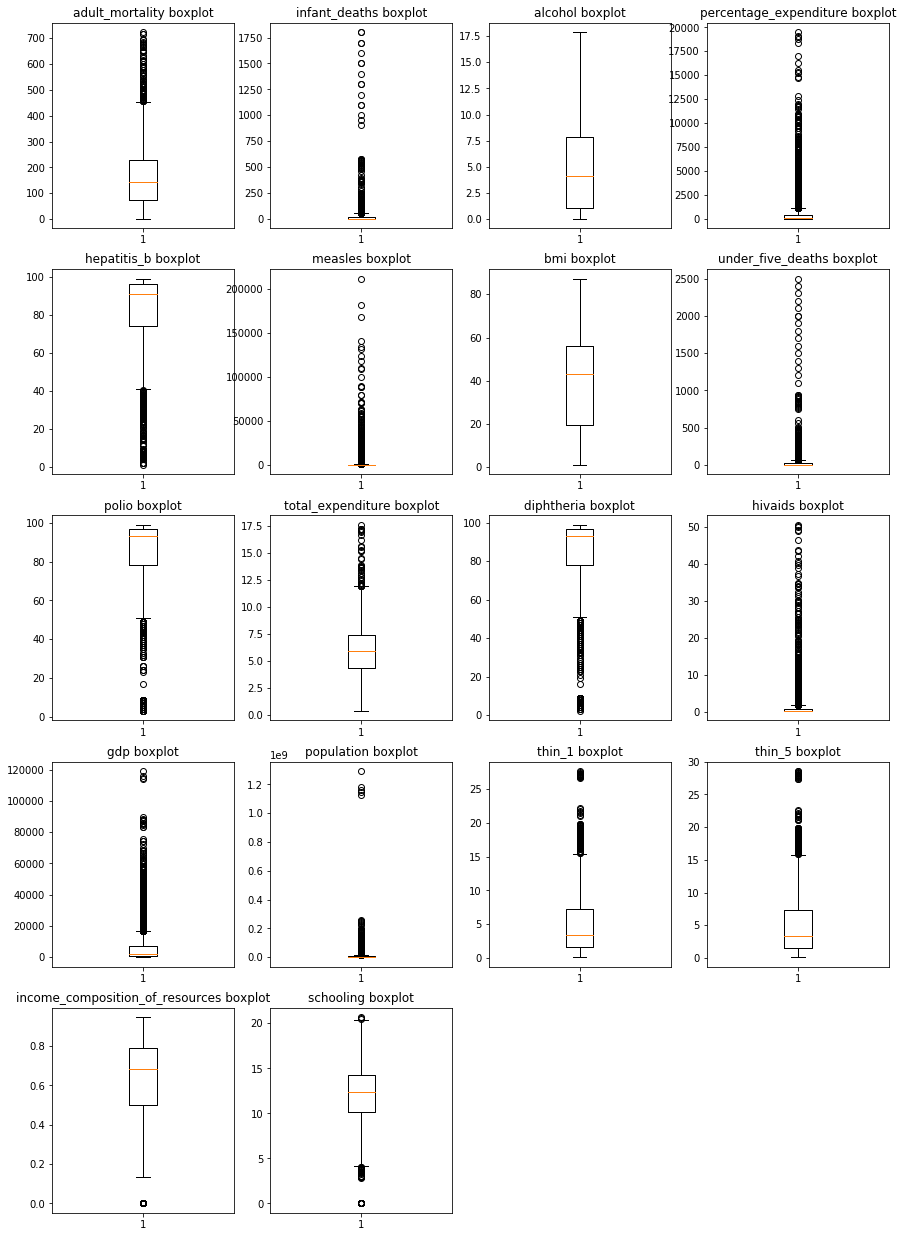

In [12]:
cont_vars = list(data.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
    plt.show()
outliers_visual(data)

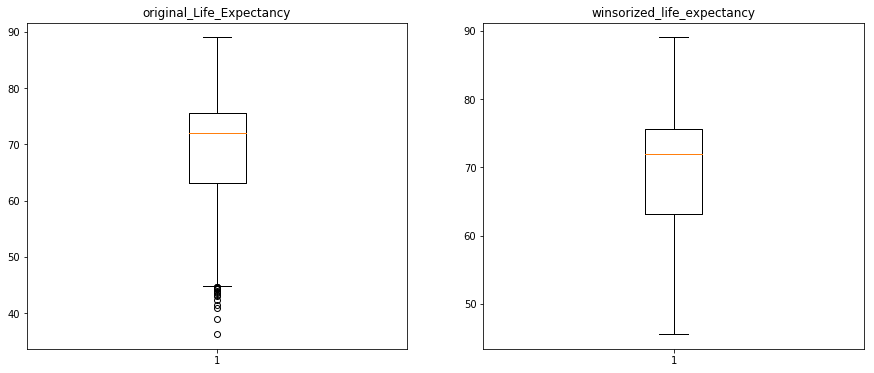

In [13]:
data_without_outliers = data.copy()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
original_life_expectancy = data_without_outliers['life_expectancy']
plt.boxplot(original_life_expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_life_expectancy = winsorize(data_without_outliers['life_expectancy'],(0.01,0))
plt.boxplot(winsorized_life_expectancy)
plt.title("winsorized_life_expectancy")

plt.show()

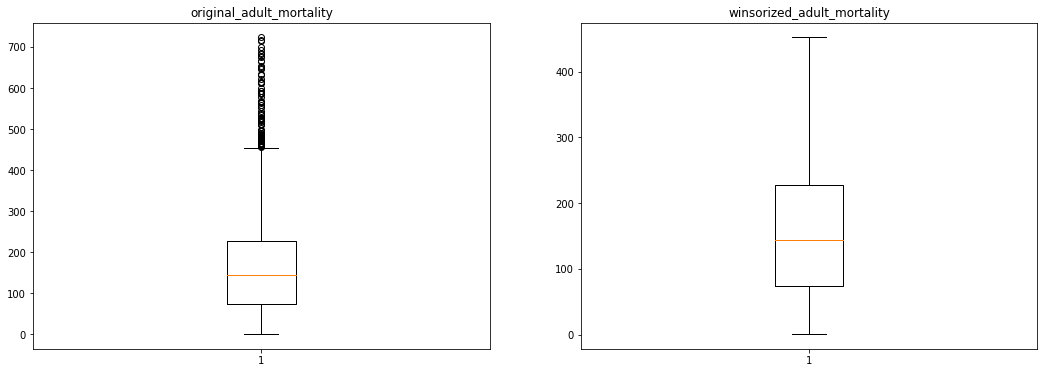

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_adult_mortality = data_without_outliers['adult_mortality']
plt.boxplot(original_adult_mortality)
plt.title("original_adult_mortality")

plt.subplot(1,2,2)
winsorized_adult_mortality = winsorize(data_without_outliers['adult_mortality'],(0,0.03))
plt.boxplot(winsorized_adult_mortality)
plt.title("winsorized_adult_mortality")

plt.show()

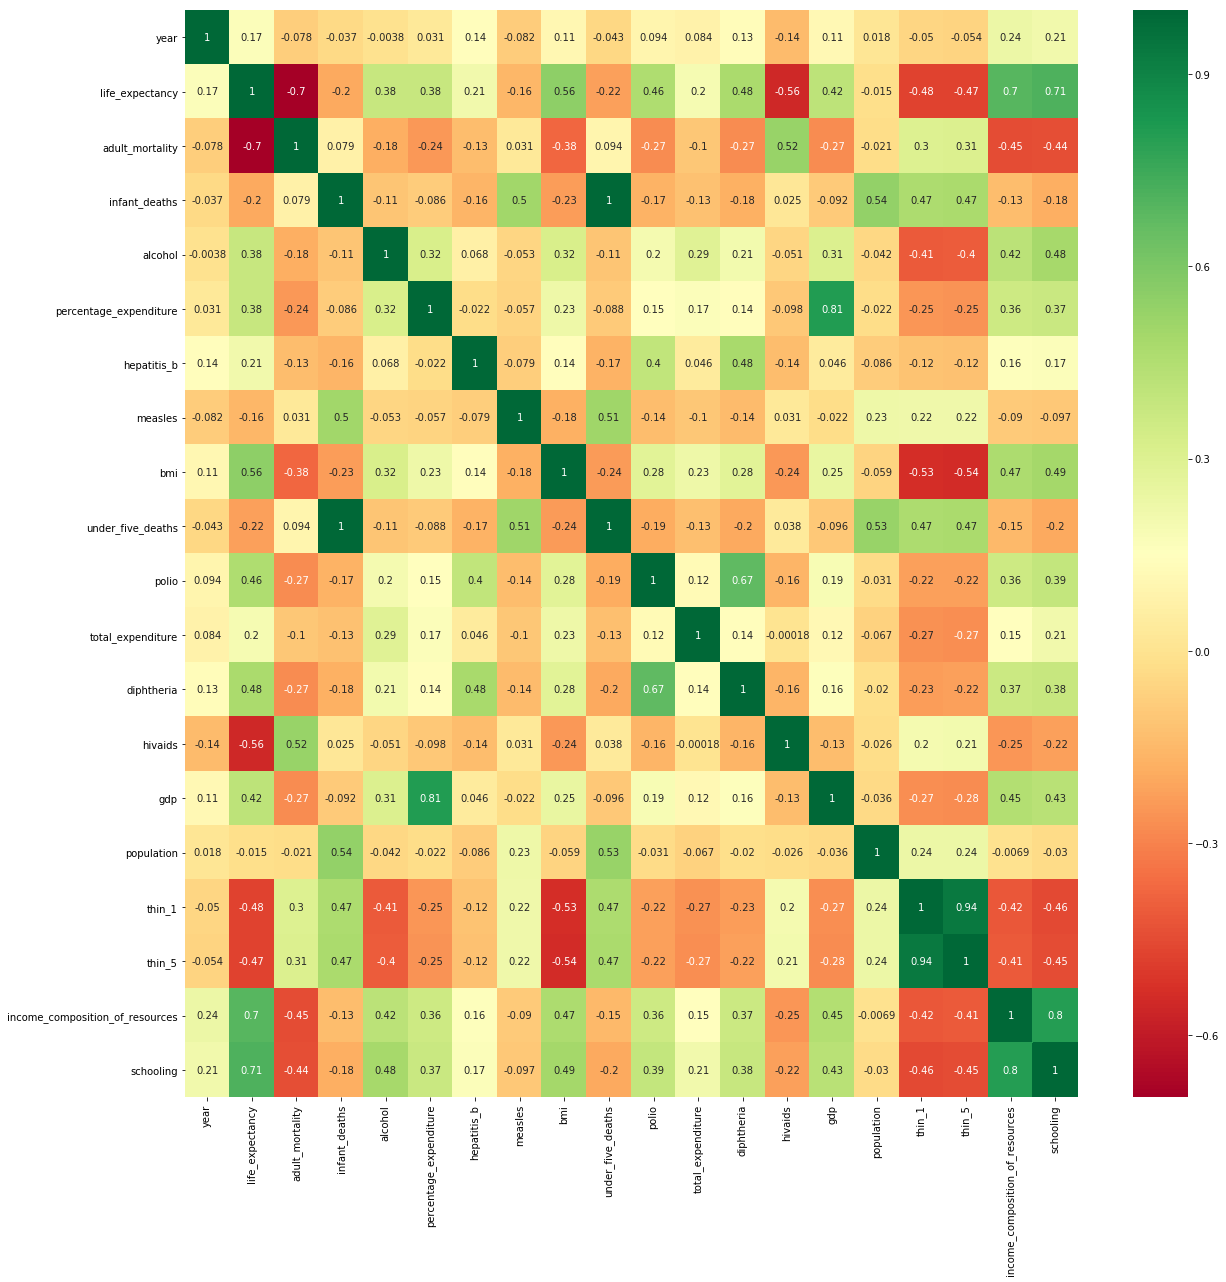

In [15]:
import seaborn as sns
import matplotlib.pyplot as mplt

corrmat = data.corr()
top_corr_features= corrmat.index
mplt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr() ,annot=True , cmap="RdYlGn")

In [16]:
data.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling
year,1.000,0.170,-0.078,-0.037,-0.004,0.031,0.140,-0.082,0.111,-0.043,0.094,0.084,0.134,-0.140,0.115,0.018,-0.050,-0.054,0.237,0.212
life_expectancy,0.170,1.000,-0.696,-0.197,0.381,0.382,0.215,-0.158,0.555,-0.222,0.463,0.197,0.476,-0.556,0.416,-0.015,-0.475,-0.471,0.695,0.714
adult_mortality,-0.078,-0.696,1.000,0.079,-0.183,-0.243,-0.134,0.031,-0.376,0.094,-0.274,-0.102,-0.274,0.523,-0.274,-0.021,0.301,0.308,-0.446,-0.439
infant_deaths,-0.037,-0.197,0.079,1.000,-0.113,-0.086,-0.161,0.501,-0.227,0.997,-0.171,-0.126,-0.175,0.025,-0.092,0.539,0.466,0.471,-0.134,-0.180
alcohol,-0.004,0.381,-0.183,-0.113,1.000,0.322,0.068,-0.053,0.324,-0.110,0.203,0.290,0.211,-0.051,0.308,-0.042,-0.411,-0.399,0.419,0.484
percentage_expenditure,0.031,0.382,-0.243,-0.086,0.322,1.000,-0.022,-0.057,0.227,-0.088,0.147,0.170,0.143,-0.098,0.814,-0.022,-0.252,-0.254,0.359,0.372
hepatitis_b,0.140,0.215,-0.134,-0.161,0.068,-0.022,1.000,-0.079,0.141,-0.167,0.400,0.046,0.482,-0.138,0.046,-0.086,-0.118,-0.122,0.160,0.167
measles,-0.082,-0.158,0.031,0.501,-0.053,-0.057,-0.079,1.000,-0.176,0.508,-0.136,-0.104,-0.142,0.031,-0.022,0.230,0.224,0.220,-0.090,-0.097
bmi,0.111,0.555,-0.376,-0.227,0.324,0.227,0.141,-0.176,1.000,-0.238,0.281,0.231,0.281,-0.242,0.247,-0.059,-0.531,-0.537,0.465,0.494
under_five_deaths,-0.043,-0.222,0.094,0.997,-0.110,-0.088,-0.167,0.508,-0.238,1.000,-0.189,-0.127,-0.196,0.038,-0.096,0.526,0.468,0.472,-0.152,-0.195


In [17]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [18]:
def linearity(data,target):
    cor_list = []
    for col in data.drop(target, axis = 1).columns:
        if col in data.select_dtypes('category').columns:
            cor_val = spearmanr(data[col], data[target])
        else:
            cor_val = pearsonr(data[col], data[target])
        cor_dict = {"Predictor": col,
                "Correlation": cor_val[0]
               }
        cor_list.append(cor_dict)
        cor_values = pd.DataFrame(cor_list)
    return cor_values

In [19]:
linearity(data,'life_expectancy')

/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,Correlation,Predictor
0,0.170,year
1,-0.545,status
2,-0.696,adult_mortality
3,-0.197,infant_deaths
4,0.381,alcohol
5,0.382,percentage_expenditure
6,0.215,hepatitis_b
7,-0.158,measles
8,0.555,bmi
9,-0.222,under_five_deaths


In [20]:
X_ = data.drop(["life_expectancy"], axis = 1)
y = data.life_expectancy.values

In [21]:
X = pd.get_dummies(X_, columns = data.select_dtypes('category').columns, drop_first = True)
X.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hivaids,gdp,population,thin_1,thin_5,income_composition_of_resources,schooling,status_Developing
0,2015,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100,1
1,2014,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000,1
2,2013,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900,1
3,2012,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800,1
4,2011,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500,1


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y Test:", y_test.shape)

X Train: (2350, 20)
X Test: (588, 20)
y Train: (2350,)
y Test: (588,)


In [23]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
predictions = lm.predict(X_test)
pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
pred1 = pred.head(10)
pred1

,Actual,Predicted
0,73.700,67.259
1,75.900,77.118
2,74.200,74.927
3,76.800,77.493
4,51.900,47.455
5,49.600,50.431
6,67.400,67.871
7,73.900,70.722
8,77.200,74.405
9,55.000,54.585


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.829179854291739
Mean Squared Error: 14.822005464326935
Root Mean Squared Error: 3.849935774052203
